In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import copy

In [2]:
train = pd.read_csv("train.csv")

train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
data = train[['LotArea', 'SalePrice']]

data

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
...,...,...
1455,7917,175000
1456,13175,210000
1457,9042,266500
1458,9717,142125


In [4]:
x = data['LotArea'].tolist()
y = data['SalePrice'].tolist()



# Don't forget - adding ones to the x matrix
xb = np.c_[np.ones((len(x),1)),x]
# calculate linear regression parameters theta using the normal equation
thetaHat = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)

In [5]:
learningRate = 0.0001
numIterations = 1000
m = 100

# random initialization with standard normal distribution
theta = np.random.randn(2,1)

for iteration in range(numIterations):
    s = xb.T.dot(xb.dot(theta) - y)
    gradients = 2/m * s
    theta = theta - learningRate * gradients
    #print("Ti",iteration," is: ",theta)

print("Theta BGD:", theta)

<ipython-input-5-0b5565291e82>:11: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learningRate * gradients


Theta BGD: [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [6]:
def MSE(xb,y,theta):
    return np.sum(np.square(xb.dot(theta)-y))/len(y)

In [7]:
learningRate = 0.0002
numIterations = 100000
y = np.array(y).reshape(-1,1)
m = len(y) # number of samples

# random initialization with standard normal distribution
theta = np.random.randn(2,1)

cost = []
# start gradient descent
for i in range(numIterations):
    gradient = 2/m * xb.T.dot(xb.dot(theta) - y) # dimension: (2,1)
    theta = theta - learningRate * gradient
    cost.append(MSE(xb,y,theta))
    
    theta

C:\Users\aurel\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-6-8249c3158e1a>:2: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(xb.dot(theta)-y))/len(y)
<ipython-input-7-d9fa83a4eca7>:13: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learningRate * gradient


Text(0, 0.5, 'MSE')

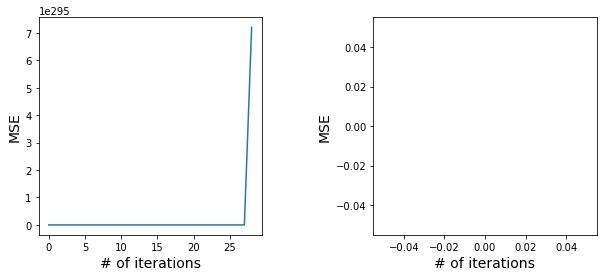

In [8]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
ax[0].plot(range(0,100),cost[0:100])
ax[1].plot(range(10000,20001), cost[10000:20001])
plt.subplots_adjust(wspace=0.5)
ax[0].set_xlabel('# of iterations', fontsize = 14)
ax[1].set_xlabel('# of iterations', fontsize = 14)
ax[0].set_ylabel('MSE', fontsize = 14)
ax[1].set_ylabel('MSE', fontsize = 14)

In [9]:
theta = np.random.randn(2,1)
gradient = 2/m * xb.T.dot(xb.dot(theta) - y)
print(gradient)

[[-3.98991511e+05]
 [-4.96591631e+09]]


In [10]:
xbStandard = copy.deepcopy(xb) # we don't want to mess with xb! xbStandard = xb will lead to xb being normalized, too.
# save the shift and scaling
mu = np.mean(xbStandard[:,1]) 
sigma = np.std(xbStandard[:,1])
# standardization
xbStandard[:,1]=(xbStandard[:,1]-mu)/sigma
print(xbStandard[0:5])
print(mu)
print(sigma)

[[ 1.         -0.20714171]
 [ 1.         -0.09188637]
 [ 1.          0.07347998]
 [ 1.         -0.09689747]
 [ 1.          0.37514829]]
10516.828082191782
9977.846105448105


In [11]:
print(theta)

[[-0.84617409]
 [-1.76609464]]


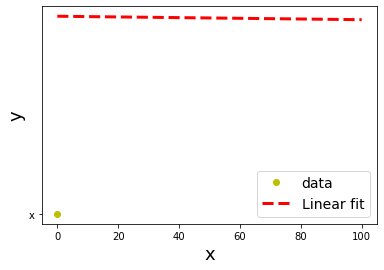

In [12]:
xFit = np.linspace(0,100,num = 200)
xFitStandard = (xFit - mu)/sigma # use the previously saved mean and standard deviation
xFitStandardb = np.c_[np.ones((len(xFitStandard),1)), xFitStandard]
yFit = xFitStandardb.dot(theta)

plt.plot('x','y',data = data, marker = 'o', linestyle = '', label = 'data')
plt.plot(xFit, yFit, color = 'r', lw = 3, linestyle = '--', label = 'Linear fit')
plt.xlabel('x',fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()